In [1]:
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [2]:
df = pd.read_csv("./iris-data.csv")
df

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# Drop null rows
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  145 non-null    float64
 1   sepal_width_cm   145 non-null    float64
 2   petal_length_cm  145 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            145 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


In [6]:
df.loc[df['class'] == 'Iris-setossa', 'class'] = 'Iris-setosa'

In [7]:
df.loc[df['class'] == 'versicolor', 'class'] = 'Iris-versicolor'

In [8]:
#df.loc[df['sepal_length_cm'] < 0.5] = 100 
df[df['class'] == 'Iris-versicolor'].sort_values('sepal_length_cm')

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
81,0.055,2.4,3.7,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
77,0.067,3.0,5.0,1.7,Iris-versicolor
57,4.900,2.4,3.3,1.0,Iris-versicolor
60,5.000,2.0,3.5,1.0,Iris-versicolor
93,5.000,2.3,3.3,1.0,Iris-versicolor
98,5.100,2.5,3.0,1.1,Iris-versicolor
59,5.200,2.7,3.9,1.4,Iris-versicolor


In [9]:
df['sepal_length_cm'] = df['sepal_length_cm'].apply(lambda x: x * 100 if x < 0.5 else x)

/tmp/ipykernel_10072/4265239942.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sepal_length_cm'] = df['sepal_length_cm'].apply(lambda x: x * 100 if x < 0.5 else x)


In [10]:
df[df['class'] == 'Iris-versicolor'].sort_values('sepal_length_cm')

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
57,4.9,2.4,3.3,1.0,Iris-versicolor
60,5.0,2.0,3.5,1.0,Iris-versicolor
93,5.0,2.3,3.3,1.0,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor
59,5.2,2.7,3.9,1.4,Iris-versicolor
84,5.4,3.0,4.5,1.5,Iris-versicolor
89,5.5,2.5,4.0,1.3,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
81,5.5,2.4,3.7,1.0,Iris-versicolor
80,5.5,2.4,3.8,1.1,Iris-versicolor


In [11]:
df[df['class'] == 'Iris-virginica'].sort_values('sepal_length_cm')

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
106,4.9,2.5,4.5,1.7,Iris-virginica
122,5.6,2.8,6.7,2.0,Iris-virginica
121,5.6,2.8,4.9,2.0,Iris-virginica
113,5.7,2.5,5.0,2.0,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
114,5.8,2.8,5.1,2.4,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica
119,6.0,2.2,5.0,1.5,Iris-virginica
138,6.0,3.0,4.8,1.8,Iris-virginica


<Axes: xlabel='sepal_length_cm', ylabel='class'>

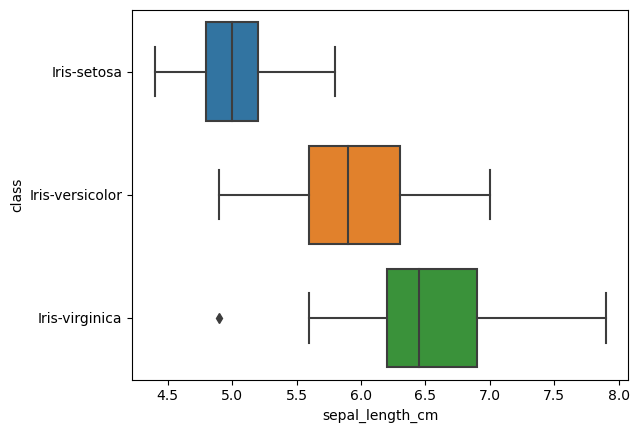

In [12]:
sns.boxplot(data=df, x="sepal_length_cm", y="class")

<Axes: xlabel='sepal_width_cm', ylabel='class'>

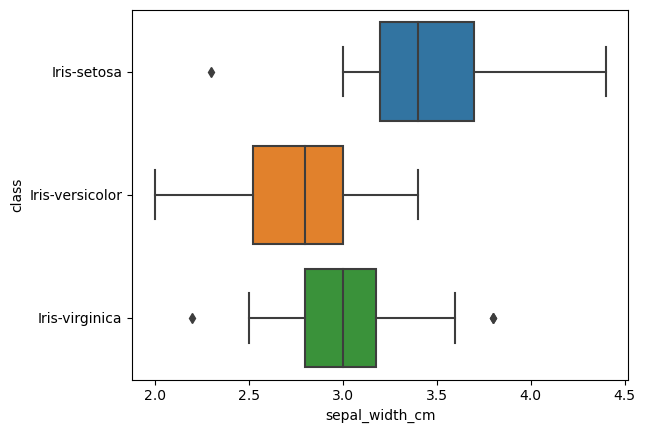

In [13]:
sns.boxplot(data=df, x="sepal_width_cm", y="class")

<Axes: xlabel='petal_length_cm', ylabel='class'>

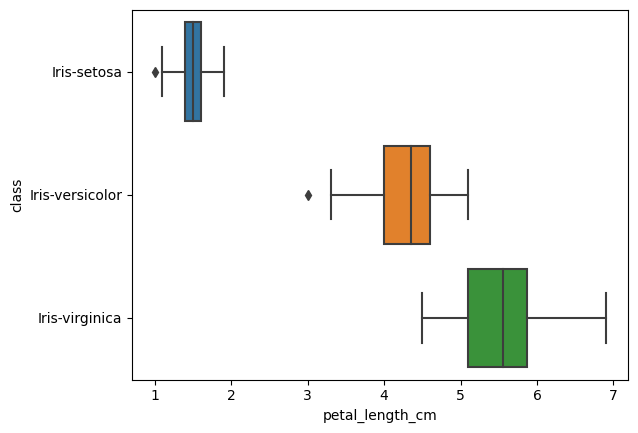

In [14]:
sns.boxplot(data=df, x="petal_length_cm", y="class")

<Axes: xlabel='petal_width_cm', ylabel='class'>

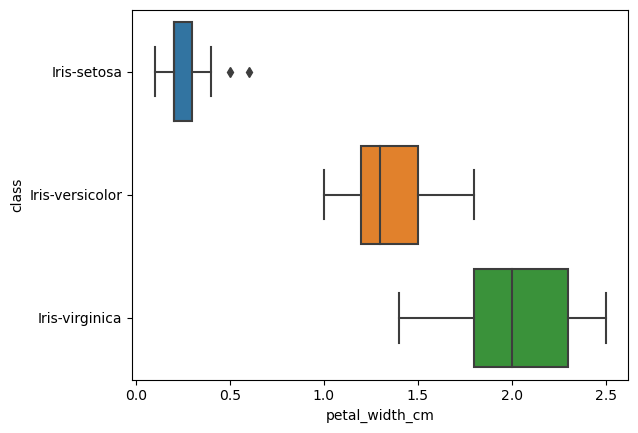

In [15]:
sns.boxplot(data=df, x="petal_width_cm", y="class")

In [16]:
encoded_df = pd.get_dummies(df, columns=['class'], drop_first=True)


In [17]:
encoded_df

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class_Iris-versicolor,class_Iris-virginica
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,1
146,6.3,2.5,5.0,2.3,0,1
147,6.5,3.0,5.2,2.0,0,1
148,6.2,3.4,5.4,2.3,0,1


In [18]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(encoded_df)
scaled_data

array([[-0.97147412,  1.04658781, -1.40278887, -1.37756865, -0.72547625,
        -0.72547625],
       [-1.22346651, -0.10656745, -1.40278887, -1.37756865, -0.72547625,
        -0.72547625],
       [-1.4754589 ,  0.35469465, -1.46036158, -1.37756865, -0.72547625,
        -0.72547625],
       [-1.60145509,  0.1240636 , -1.34521616, -1.37756865, -0.72547625,
        -0.72547625],
       [-1.09747031,  1.27721886, -1.40278887, -1.37756865, -0.72547625,
        -0.72547625],
       [-0.59348553,  1.96911201, -1.23007074, -1.11177031, -0.72547625,
        -0.72547625],
       [-1.60145509,  0.81595675, -1.40278887, -1.24466948, -0.72547625,
        -0.72547625],
       [-1.3494627 , -0.10656745, -1.40278887, -1.51046782, -0.72547625,
        -0.72547625],
       [-0.21549694, -0.10656745, -1.575507  , -1.51046782, -0.72547625,
        -0.72547625],
       [-0.08950075,  2.19974306, -1.51793429, -1.37756865, -0.72547625,
        -0.72547625],
       [-0.21549694,  3.12226727, -1.34521616, -1.

In [19]:
df_scaled = pd.DataFrame(scaled_data)
df_scaled.columns = encoded_df.columns
df_scaled

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class_Iris-versicolor,class_Iris-virginica
0,-0.971474,1.046588,-1.402789,-1.377569,-0.725476,-0.725476
1,-1.223467,-0.106567,-1.402789,-1.377569,-0.725476,-0.725476
2,-1.475459,0.354695,-1.460362,-1.377569,-0.725476,-0.725476
3,-1.601455,0.124064,-1.345216,-1.377569,-0.725476,-0.725476
4,-1.097470,1.277219,-1.402789,-1.377569,-0.725476,-0.725476
...,...,...,...,...,...,...
140,1.044465,-0.106567,0.784974,1.413314,-0.725476,1.378405
141,0.540480,-1.259723,0.669829,1.413314,-0.725476,1.378405
142,0.792473,-0.106567,0.784974,1.014616,-0.725476,1.378405
143,0.414484,0.815957,0.900120,1.413314,-0.725476,1.378405


In [20]:
df_scaled.to_csv('./iris_transform.csv', index=False)